In [4]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Twitter Handle Source: https://pressgallery.house.gov/member-data/members-official-twitter-handles

#Import appropriate libraries

import tweepy
import pandas as pd

#Define Access Keys

api_key = 't7U9rmjmbvqZCQnherHkrDZ9q'
api_key_secret = 'k5FwX8KGxruNp9oUlhNCb1xHtJ1JjIIlI7ozai5vGaMM2pIaCU'

access_token = '1532526934269239303-nQpMFHharyoQCfc8FoNuUwAUFdJM6Y'
access_token_secret = 'ndON5Ktl0MEOFDtjGMjGVkuRz4D6FWpaPruh2IHUWEgC0'

# authentication
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

# Pull tweet based off user

users = ["RepDonBeyer","SanfordBishop","repblumenauer","RepLBR","RepBonamici","RepBourdeaux","RepBowman","CongBoyle","RepAnthonyBrown","RepShontelBrown","RepBrownley","RepCori","RepCheri","GKButterfield","RepCarbajal","RepCardenas","RepAndreCarson","RepTroyCarter","RepCartwright","RepEdCase","RepCasten","USRepKCastor","JoaquinCastrotx","CongresswomanSC","RepJudyChu","davidcicilline","RepCicilline","RepKClark","RepYvetteClarke","repcleaver","WhipClyburn","RepCohen","GerryConnolly","repjimcooper","RepLouCorrea","RepJimCosta","RepJoeCourtney","RepAngieCraig","RepCharlieCrist","RepJasonCrow","RepCuellar","RepDavids","RepDannyDavis","RepDean","RepPeterDeFazio","RepDianaDeGette","rosadelauro","RepDelBene","repdelgado","RepValDemings","RepDeSaulnier","RepTedDeutch","RepDebDingell","RepLloydDoggett","USRepMikeDoyle","RepEscobar","RepAnnaEshoo","RepEspaillat","RepDwightEvans","RepFletcher","RepBillFoster","RepLoisFrankel","RepRubenGallego","RepGaramendi","RepSylviaGarcia"]
limit= 500
data = []
for user in users:
  tweets = tweepy.Cursor(api.user_timeline, screen_name=user, count=200, tweet_mode='extended').items(limit)

# tweets = api.user_timeline(screen_name=user, count=limit, tweet_mode='extended')

# create DataFrame
  columns = ['User', 'Tweet']
  for tweet in tweets:
        print(tweet.user.screen_name)
        data.append([tweet.user.screen_name, tweet.full_text])
        df_1 = pd.DataFrame(data, columns=columns)

#Export to csv
from google.colab import files
df_1.to_csv('filename.csv') 
files.download('filename.csv')

#Pull tweet based off user


users = ["RepBice","RepAndyBiggsAZ","RepGusBilirakis","RepDanBishop","RepBoebert","RepBost","RepKevinBrady","RepMoBrooks","VernBuchanan","RepKenBuck","RepLarryBucshon","RepTedBudd","RepTimBurchett","michaelcburgess","KenCalvert","RepKatCammack","RepMikeCarey","RepJerryCarl","RepBuddyCarter","JudgeCarter","RepCawthorn","RepSteveChabot","RepLizCheney","RepBenCline","RepCloudTX","Rep_Clyde","TomColeOK04","RepJamesComer","RepRickCrawford","RepDanCrenshaw","RepJohnCurtis","WarrenDavidson","RodneyDavis","DesJarlaisTN04","MarioDB","RepDonaldsPress","RepJeffDuncan","DrNealDunnFL2","RepEllzey","RepTomEmmer","RepRonEstes","RepPatFallon","RepFeenstra","RepDrewFerguson","RepFischbach","RepFitzgerald","RepBrianFitz","RepChuck","JeffFortenberry","virginiafoxx","RepFranklin","RepRussFulcher","RepMattGaetz","RepGallagher","RepGarbarino","RepMikeGarcia","RepBobGibbs","RepCarlos",]
limit= 500
data = []
for user in users:
  tweets = tweepy.Cursor(api.user_timeline, screen_name=user, count=200, tweet_mode='extended').items(limit)

# tweets = api.user_timeline(screen_name=user, count=limit, tweet_mode='extended')

# create DataFrame
  columns = ['User', 'Tweet']
  for tweet in tweets:
        print(tweet.user.screen_name)
        data.append([tweet.user.screen_name, tweet.full_text])
        df_1 = pd.DataFrame(data, columns=columns)

  print(df_1)

from google.colab import files
df_1.to_csv('filename.csv') 
files.download('filename.csv')


In [6]:
#Import corpus csv

import pandas as pd

df_final = pd.read_csv("/Users/abhimanyuanand/Desktop/Corpus_USSenatorTweets.csv")

print(df_final.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72218 entries, 0 to 72217
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   User    72217 non-null  object
 1   Tweet   72218 non-null  object
 2   Label   72218 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB
None


In [7]:
df_final.head()

,User,Tweet,Label
0,RepAdams,I didn't ask for a pardon.\n\nBut a certain Pr...,D
1,RepAdams,Your daily reminder that instead of saying som...,D
2,RepAdams,I’m proud to work with my Congressional collea...,D
3,RepAdams,RT @grantstern: Multiple Republican Congressme...,D
4,RepAdams,RT @MacFarlaneNews: Approx. 140 police officer...,D


In [8]:
#define a function to clean up the tweets. input - text field of all #the rows, output - cleaned text - remove @, hashtags, urls, emojis 

import re 

def cleanUpTweet(txt):
    # Remove mentions
    txt = re.sub(r'@+', '', txt)
    # Remove hashtags
    txt = re.sub(r'#[A-Z0-9]+', '', txt)
    # Remove retweets:
    txt = re.sub(r'RT : ', '', txt)
    # Remove urls
    txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', txt)
    #remove amp
    txt = re.sub(r'&amp;', '', txt)
    #rempve strange characters
    txt = re.sub(r'ðŸ™', '', txt)
    #remove new lines
    txt = re.sub(r'\n', ' ', txt)
    return txt

df_final['Cleaned_Tweet'] = df_final['Tweet'].apply(cleanUpTweet)

In [9]:
df_final.head()

,User,Tweet,Label,Cleaned_Tweet
0,RepAdams,I didn't ask for a pardon.\n\nBut a certain Pr...,D,I didn't ask for a pardon. But a certain Pres...
1,RepAdams,Your daily reminder that instead of saying som...,D,Your daily reminder that instead of saying som...
2,RepAdams,I’m proud to work with my Congressional collea...,D,I’m proud to work with my Congressional collea...
3,RepAdams,RT @grantstern: Multiple Republican Congressme...,D,RT grantstern: Multiple Republican Congressmen...
4,RepAdams,RT @MacFarlaneNews: Approx. 140 police officer...,D,RT MacFarlaneNews: Approx. 140 police officers...


# Sentiment Analysis using BERT

In [10]:
!pip install transformers

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from textwrap import wrap

# Torch ML libraries
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader

# Misc.
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import re
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow_hub as hub
#from nltk.corpus import stopwords
#from nltk.stem.porter import PorterStemmer



In [12]:
# Set intial variables and constants
%config InlineBackend.figure_format='retina'

# Graph Designs
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8

# Random seed for reproducibilty
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

# Set GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [13]:
df = pd.read_csv('/Users/abhimanyuanand/Desktop/Corpus_USSenatorTweets.csv')
df.shape

(72218, 3)

In [14]:
df.head(1000)


,User,Tweet,Label
0,RepAdams,I didn't ask for a pardon.\n\nBut a certain Pr...,D
1,RepAdams,Your daily reminder that instead of saying som...,D
2,RepAdams,I’m proud to work with my Congressional collea...,D
3,RepAdams,RT @grantstern: Multiple Republican Congressme...,D
4,RepAdams,RT @MacFarlaneNews: Approx. 140 police officer...,D
...,...,...,...
995,Robert_Aderholt,"With so many cancellations across the country,...",R
996,Robert_Aderholt,RT @USDA: Additional commodities are now cover...,R
997,Robert_Aderholt,Today I met with @FBI Director Christopher Wra...,R
998,Robert_Aderholt,Players are safer within their programs than t...,R


In [15]:
#Training data
train = pd.read_csv('/Users/abhimanyuanand/Desktop/Corpus_USSenatorTweets.csv')
test = pd.read_csv('/Users/abhimanyuanand/Desktop/Corpus_USSenatorTweets.csv')
print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

# First few rows of the training dataset
train.head(1000)

# First few rows of the testing dataset
test.head(1000)

Training data shape:  (72218, 3)
Testing data shape:  (72218, 3)


,User,Tweet,Label
0,RepAdams,I didn't ask for a pardon.\n\nBut a certain Pr...,D
1,RepAdams,Your daily reminder that instead of saying som...,D
2,RepAdams,I’m proud to work with my Congressional collea...,D
3,RepAdams,RT @grantstern: Multiple Republican Congressme...,D
4,RepAdams,RT @MacFarlaneNews: Approx. 140 police officer...,D
...,...,...,...
995,Robert_Aderholt,"With so many cancellations across the country,...",R
996,Robert_Aderholt,RT @USDA: Additional commodities are now cover...,R
997,Robert_Aderholt,Today I met with @FBI Director Christopher Wra...,R
998,Robert_Aderholt,Players are safer within their programs than t...,R


In [16]:
train.isnull().sum()
#Missing values in test set
test.isnull().sum()

User     1
Tweet    0
Label    0
dtype: int64

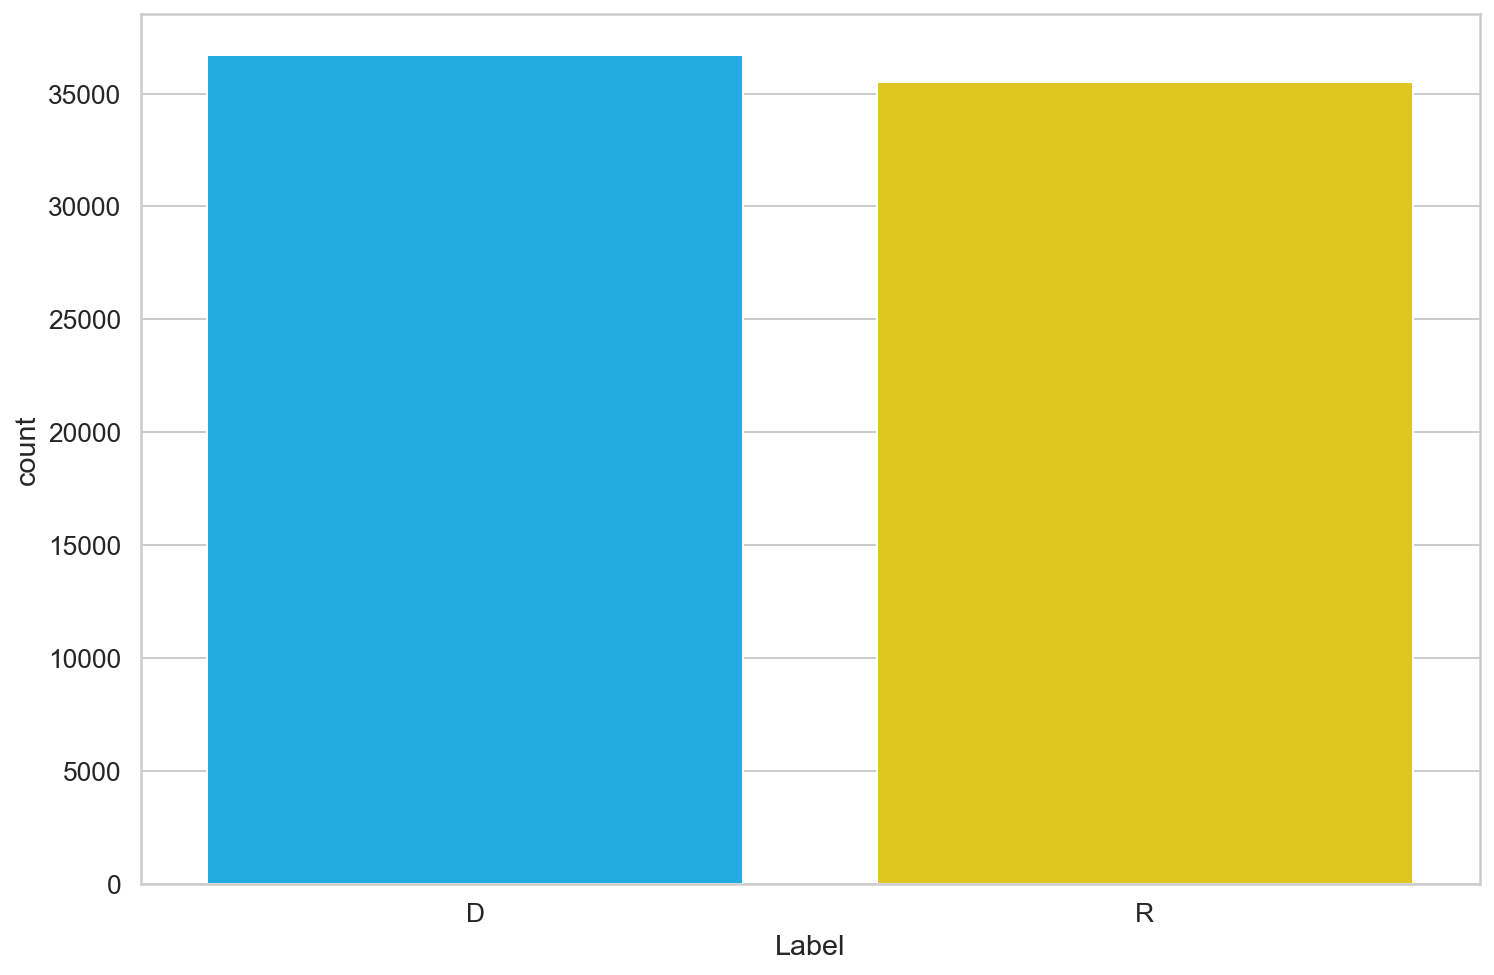

In [17]:
# Let's have a look at the class balance.
sns.countplot(df.Label)
plt.xlabel('Label');

In [18]:
# Dropping missing values
train.dropna(axis = 0, how ='any',inplace=True) ;
  

In [19]:
train['Label'].value_counts()

D    36695
R    35522
Name: Label, dtype: int64

In [20]:
train['Label'].value_counts(normalize=True)

D    0.508121
R    0.491879
Name: Label, dtype: float64

# Text Data Preprocessing for BERT

In [23]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

!pip install chart_studio
!pip install textstat

import numpy as np 
import pandas as pd 

# text processing libraries
import re
import string
import nltk
from nltk.corpus import stopwords


# Visualisation libraries
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import chart_studio.plotly as py
import plotly.figure_factory as ff
from plotly.offline import iplot


# sklearn 
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

# File system manangement
import os

# Pytorch
import torch

#Transformers
from transformers import BertTokenizer

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

In [30]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text


def text_preprocessing(text):
    """
    Cleaning and parsing the text.

    """
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    nopunc = clean_text(text)
    tokenized_text = tokenizer.tokenize(nopunc)
    #remove_stopwords = [w for w in tokenized_text if w not in stopwords.words('english')]
    combined_text = ' '.join(tokenized_text)
    return combined_text

# Analyzing Text Statistics

In [31]:
# Applying the cleaning function to both test and training datasets
train['Label'] = train['Label'].apply(str).apply(lambda x: text_preprocessing(x))
test['label'] = test['Label'].apply(str).apply(lambda x: text_preprocessing(x))

In [33]:
train.head(1000)

,User,Tweet,Label
0,RepAdams,I didn't ask for a pardon.\n\nBut a certain Pr...,d
1,RepAdams,Your daily reminder that instead of saying som...,d
2,RepAdams,I’m proud to work with my Congressional collea...,d
3,RepAdams,RT @grantstern: Multiple Republican Congressme...,d
4,RepAdams,RT @MacFarlaneNews: Approx. 140 police officer...,d
...,...,...,...
995,Robert_Aderholt,"With so many cancellations across the country,...",r
996,Robert_Aderholt,RT @USDA: Additional commodities are now cover...,r
997,Robert_Aderholt,Today I met with @FBI Director Christopher Wra...,r
998,Robert_Aderholt,Players are safer within their programs than t...,r


In [35]:
train['User'] = train['User'].astype(str).apply(len)
train['User'] = train['User'].apply(lambda x: len(str(x).split()))

In [37]:
train.head(1000)

,User,Tweet,Label
0,1,I didn't ask for a pardon.\n\nBut a certain Pr...,d
1,1,Your daily reminder that instead of saying som...,d
2,1,I’m proud to work with my Congressional collea...,d
3,1,RT @grantstern: Multiple Republican Congressme...,d
4,1,RT @MacFarlaneNews: Approx. 140 police officer...,d
...,...,...,...
995,1,"With so many cancellations across the country,...",r
996,1,RT @USDA: Additional commodities are now cover...,r
997,1,Today I met with @FBI Director Christopher Wra...,r
998,1,Players are safer within their programs than t...,r


In [53]:
pos = train[train['Label']=='positive']
neg = train[train['Label']=='negative']
neutral = train[train['Label']=='neutral']

In [61]:
import pandas as pd
pd.options.plotting.backend = "plotly"

df=pd.DataFrame(np.random.randn(10,3),columns=['D','R','C'])
df.plot()


In [56]:
pip install cufflinks

     |████████████████████████████████| 81 kB 3.9 MB/s eta 0:00:01


  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=67921 sha256=a1d79a53188e4a438f278e0f855dc9779b110c1567a626b5ce46020ce1a0e976
  Stored in directory: /Users/abhimanyuanand/Library/Caches/pip/wheels/6b/76/62/6da97734911ffcbdd559fd1a3f28526321f0ae699182a23866
Successfully built cufflinks
Note: you may need to restart the kernel to use updated packages.


In [57]:
import cufflinks as cf
cf.go_offline()
print( cf.__version__)

0.17.3


In [60]:

pos['Tweet'].iplot(
    kind='hist',
    bins=10,
    xTitle='text length',
    linecolor='black',
    color='red',
    yTitle='count',
    title='Demoractic')

neg['Tweet'].iplot(
    kind='hist',
    bins=10,
    xTitle='text length',
    linecolor='black',
    color='green',
    yTitle='count',
    title='Republican')

neutral['Tweet'].iplot(
    kind='hist',
    bins=100,
    xTitle='text length',
    linecolor='black',
    yTitle='count',
    title='Neutral Text Length Distribution')